In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

sns.set_style('darkgrid')
plt.style.use('ggplot')

In [2]:
# load data
def load_data(file_path: str):
    df = pd.read_csv(file_path)
    return df

df = load_data("Tetuan City power consumption.csv")

print(df.shape)
df.head(2)

(52416, 9)


,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DateTime                   52416 non-null  object 
 1   Temperature                52416 non-null  float64
 2   Humidity                   52416 non-null  float64
 3   Wind Speed                 52416 non-null  float64
 4   general diffuse flows      52416 non-null  float64
 5   diffuse flows              52416 non-null  float64
 6   Zone 1 Power Consumption   52416 non-null  float64
 7   Zone 2  Power Consumption  52416 non-null  float64
 8   Zone 3  Power Consumption  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [4]:
# get dates 
def get_timestamp(df: pd.DataFrame, col: str):
    df["date_day"] = (df[col].str.split(" ")).str[0]
    df["Time_day"] = (df[col].str.split(" ")).str[1]
    return df

df = get_timestamp(df, "DateTime")
df.head(2)

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption,date_day,Time_day
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,1/1/2017,0:00
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,1/1/2017,0:10


In [5]:
df.date_day.nunique(), df.Time_day.nunique()

(364, 144)

In [6]:
# cleaning the dates
def extract_dates(df: pd.DataFrame, col: str):
    df["day"] = pd.to_datetime(df[col]).dt.dayofweek
    df["month"] = pd.to_datetime(df[col]).dt.month
    df["year"] = pd.to_datetime(df[col]).dt.year
    return df
df = extract_dates(df, 'date_day')

In [7]:
df.head(2)

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption,date_day,Time_day,day,month,year
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,1/1/2017,0:00,6,1,2017
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,1/1/2017,0:10,6,1,2017


In [8]:
# drop columns DateTime, date_day and year: DateTime is no longer needed and the data is for only 2017
def drop_uneeded(df: pd.DataFrame, cols: list):
    df.drop(cols, axis=1, inplace=True)
    df.drop_duplicates(inplace=True)
    return df

df = drop_uneeded(df, ['year', 'DateTime', 'date_day'])

<font color="green">EDA</font>

In [9]:
# monthly power consumption
mean_month = df[['month','Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption']].groupby("month").mean()
mean_month.T

month,1,2,3,4,5,6,7,8,9,10,11,12
Zone 1 Power Consumption,31032.493535,30985.753632,31155.165408,31169.768210,32396.009166,34605.540839,35831.553603,36435.189574,33396.681416,32827.660055,29002.106838,29024.168427
Zone 2 Power Consumption,19394.444717,18787.793096,18457.937484,17633.966395,19977.287859,20670.928621,24147.886893,24656.216575,20180.432259,21468.993441,23240.464015,23681.852818
Zone 3 Power Consumption,17746.095349,17335.002154,16947.686004,18593.167677,17621.100953,20430.941538,28194.111216,24648.894732,14922.798774,13264.095173,12862.496653,11044.805922


/tmp/ipykernel_19748/748223562.py:3: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.lineplot(data=df_d, palette=sns.color_palette("mako_r", 6))


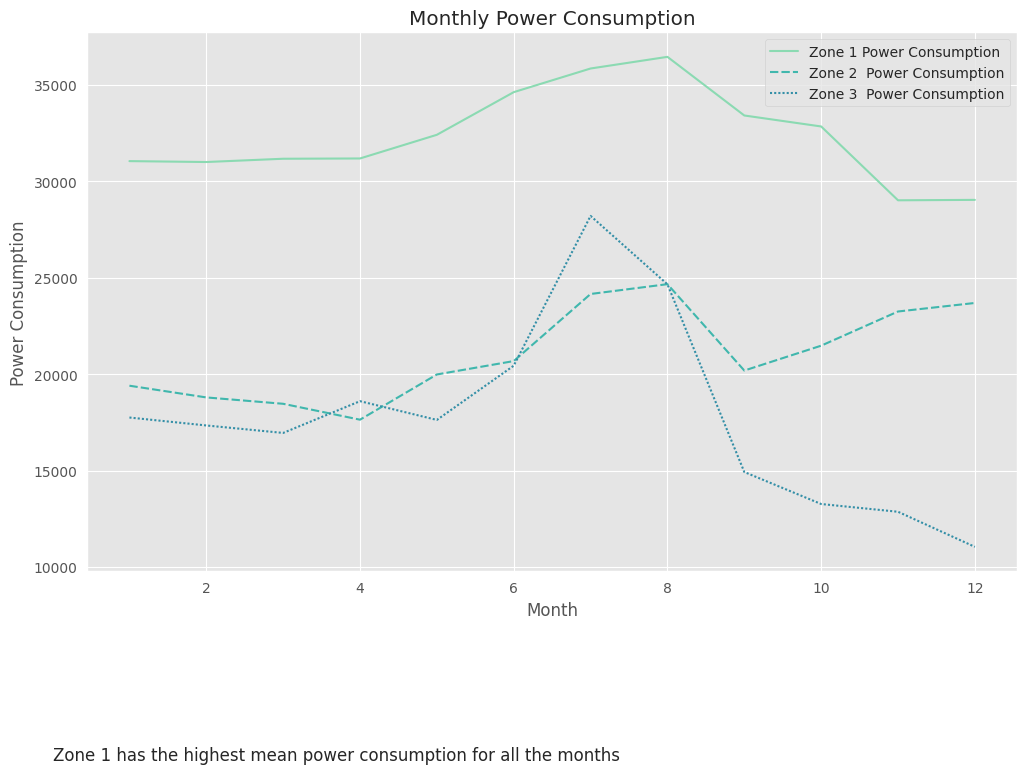

In [10]:
def plot_monthly_power_consumption(df_d: pd.DataFrame):
    fig, ax = plt.subplots(figsize=(12, 7))
    sns.lineplot(data=df_d, palette=sns.color_palette("mako_r", 6))
    ax.set_title("Monthly Power Consumption")
    ax.set_xlabel("Month")
    ax.set_ylabel("Power Consumption")
    ax.Legend_loc = "upper right"
    ax.text(0,0, "Zone 1 has the highest mean power consumption for all the months", fontsize=12)

plot_monthly_power_consumption(mean_month)

In [11]:
mean_data = df.groupby("month").mean()
mean_data.rename(columns={"Zone 1 Power Consumption": "Zone1", "Zone 2  Power Consumption": "Zone2", "Zone 3  Power Consumption": "Zone3"}, inplace=True)
mean_data

/tmp/ipykernel_19748/577475771.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_data = df.groupby("month").mean()


,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone1,Zone2,Zone3,day
month,,,,,,,,,
1,12.743092,68.294122,0.707927,103.343396,68.687413,31032.493535,19394.444717,17746.095349,2.935484
2,12.644443,66.551322,1.096494,125.768940,91.627936,30985.753632,18787.793096,17335.002154,3.000000
3,14.579907,71.100029,1.006189,181.090957,93.983753,31155.165408,18457.937484,16947.686004,3.000000
4,16.444463,75.242521,0.224269,159.399087,84.302805,31169.768210,17633.966395,18593.167677,3.166667
5,20.293564,68.712440,2.298271,273.666324,123.048394,32396.009166,19977.287859,17621.100953,2.806452
6,22.142741,68.643398,1.566689,279.645304,103.754927,34605.540839,20670.928621,20430.941538,3.033333
7,27.203685,57.508934,4.630617,293.841041,75.207148,35831.553603,24147.886893,28194.111216,3.064516
8,25.748271,66.051290,4.534733,228.031346,67.400193,36435.189574,24656.216575,24648.894732,2.903226
9,22.637787,66.852981,2.946210,201.210298,48.627872,33396.681416,20180.432259,14922.798774,3.100000


In [12]:
# two way anova test for zone 3
# Run the ANOVA
model = sm.formula.ols('Zone3 ~ Temperature + Humidity + Temperature:Humidity', data = mean_data).fit()

# Extract our table
aov_table = sm.stats.anova_lm(model, typ=2)

# Print the table
print(aov_table)

                            sum_sq   df         F    PR(>F)
Temperature           3.262109e+07  1.0  2.586178  0.146467
Humidity              3.040047e+07  1.0  2.410129  0.159155
Temperature:Humidity  2.036712e+07  1.0  1.614692  0.239538
Residual              1.009090e+08  8.0       NaN       NaN


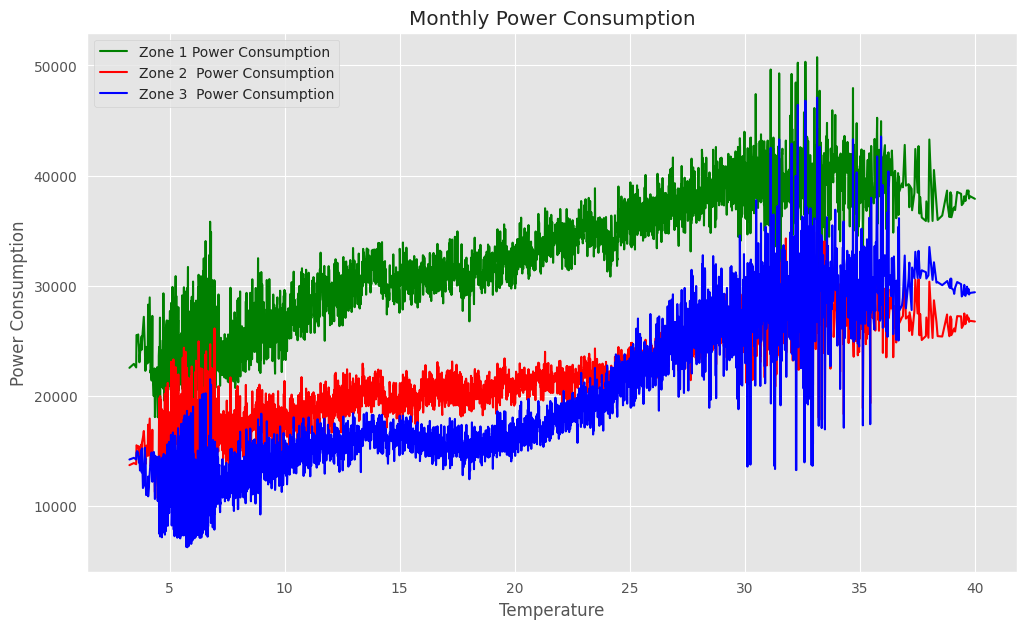

In [55]:
feature_cols = ['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows', 'diffuse flows']
zone_cols = ['Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption']

def investigate_zones(data: pd.DataFrame ,feature: str, kind: str = "line"):
    c_palette = ['g', 'r', 'b']
    data = data[zone_cols + [feature]].groupby(feature).mean().reset_index()
    # make the data logaritmic and temperature the index
    # data = np.log(data)
    data.set_index(feature, inplace=True)

    if kind == "line":
        fig, ax = plt.subplots(figsize=(12, 7))
        sns.lineplot(data=data, palette=c_palette, dashes=False)
        ax.set_title("Monthly Power Consumption")
        ax.set_xlabel(feature)
        ax.set_ylabel("Power Consumption")
        ax.Legend_loc = "upper right"
    if kind == 'density':
        fig, ax = plt.subplots(figsize=(12, 7))
        sns.kdeplot(data=data, palette=c_palette, fill=True)
        ax.set_title("Monthly Power Consumption")
        ax.set_xlabel(feature)
        ax.set_ylabel("Power Consumption")
        # ax.legend(loc='upper left')

investigate_zones(df, "Temperature")

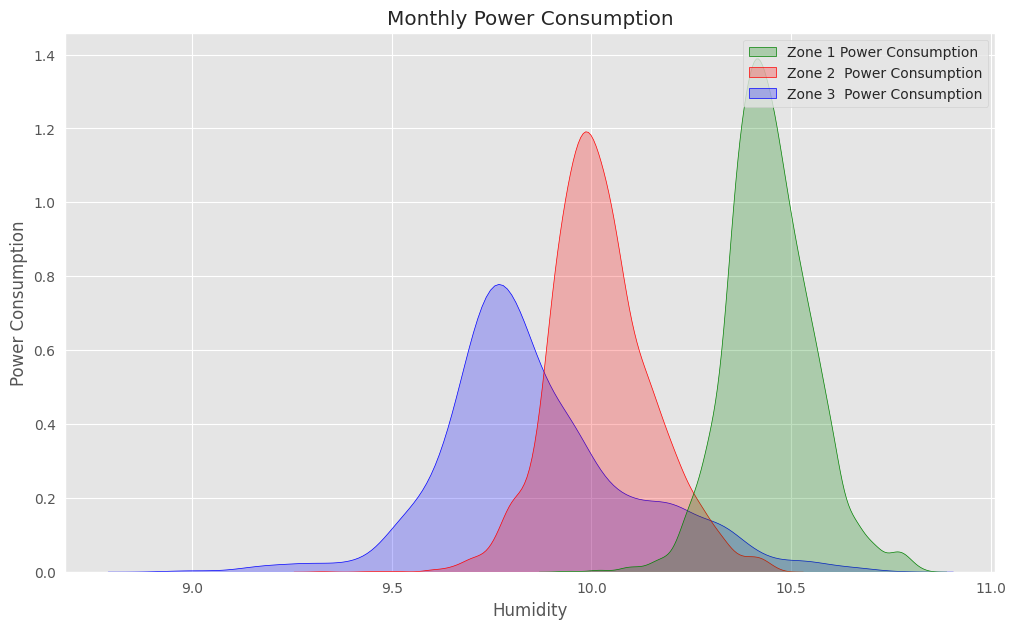

In [52]:
investigate_zones(df, "Humidity", 'density')

In [63]:
import plotly.express as px
import plotly.graph_objects as go
import nbformat

In [ ]:
fig = go.Figure()
# add trace for each zone
for zone in zone_cols:
    fig.add_trace(go.Scatter(x=df["Temperature"], y=df[zone], mode='markers', name=zone))
fig.update_layout(title="Temperature vs Power Consumption", xaxis_title="Temperature", yaxis_title="Power Consumption")
